In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_90267/1293129172.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


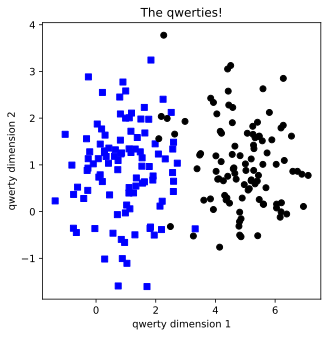

In [2]:
# create data
nPerClust=100
blur=1

A=[1,1]
B=[5,1]

# generate data
a=[A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b=[B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np=np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concat into matrix
data_np=np.hstack((a,b)).T

# convert to tensor
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()

# show the data
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [4]:
# build the model
ANNclassify=nn.Sequential(
    nn.Linear(2,1), # input
    nn.ReLU(), # activation
    nn.Linear(1,1), # output
    nn.Sigmoid(), # final activation
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# other model features
learningRate=.01

# loss function
lossfun=nn.BCELoss()
# but better to use nn.BCEWithLogitsLoss if last sigmoid layer not including...

optimizer=torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [6]:
# train the model
numepochs=1000
losses=torch.zeros(numepochs)

for epochi in range(numepochs):
    # fwd pass
    yHat=ANNclassify(data)

    # compute loss
    loss=lossfun(yHat,labels)
    losses[epochi]=loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

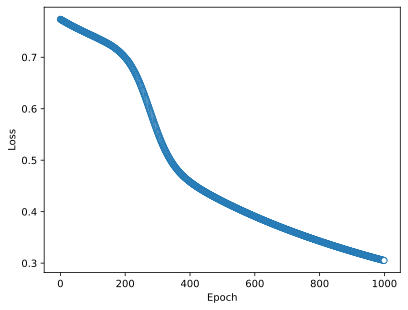

In [7]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# there is no asymptode yet. so model can still learn

In [9]:
# compute the predictions
# manually compute loss
# final fwd pass
predictions=ANNclassify(data)

predlabels=predictions>.5

# final errors
misclassified=np.where(predlabels!=labels)[0]

# total accuracy
totalacc=100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 90.5%


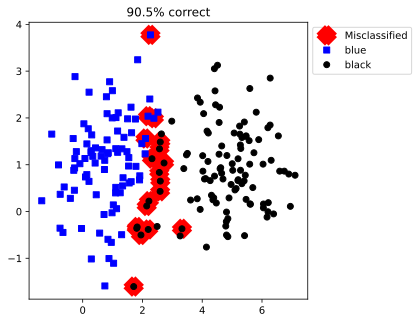

In [12]:
# plot the labelled data
fig=plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize=12,markeredgewidth=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()